# Trump Family Connection
- Data set refrence - [kaggle](https://www.kaggle.com/skylord/trumpworld) 
- Code refernce - [kaggle](https://www.kaggle.com/skylord/trumpworld)

## Import necessary module

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

## Data preperation

Each row represents a connection between a person and another person

In [2]:
df=pd.read_csv("Person_Person.csv")
df.head()

,Person A,Person B,Connection,Source(s)
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...
1,ALLEN WEISSELBERG,JACK WEISSELBERG,Parent/child,https://www.nytimes.com/2016/05/24/business/de...
2,ANAR MAMMADOV,ZIYA MAMMADOV,Parent/child,https://www.meydan.tv/en/site/politics/13787/
3,ANDREW BREMBERG,MIKE FERGUSON,"Bremberg ""is a lifelong friend"" of Ferguson, a...",https://www.statnews.com/2016/11/15/trump-infl...
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...


In [3]:
df.shape

(264, 4)

Filter people who only appear once in the data frame

In [4]:
personA_unique = set(df['Person A'].unique()) #set or list does not matter because it's already unique 
personB_unique = set(df['Person B'].unique())

# get the symmetric diffrence - method 1 
persons_toDrop = personA_unique ^ personB_unique

<details><summary>Click here for symmetric difference - method 2</summary>

```python
personA_toDrop = [element for element in personA_unique if element not in personB_unique]
personB_toDrop = [element for element in personB_unique if element not in personA_unique]

persons_toDrop = personA_toDrop + personB_toDrop
```

</details>


Drop people who only appear once from the data frame

In [5]:
for element in persons_toDrop:
    if element in df['Person A'].values.tolist():
        df.drop(df.loc[df['Person A']== element].index[0], inplace=True)

In [6]:
for element in persons_toDrop:
    if element in df['Person B'].values.tolist():
        df.drop(df.loc[df['Person B']== element].index[0], inplace=True)

Down to 85 rows of connections

In [7]:
df.shape

(85, 4)

Reset index

In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,Person A,Person B,Connection,Source(s)
0,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...
1,CHARLES KUSHNER,NICOLE KUSHNER MEYER,Parent/child,http://www.townandcountrymag.com/society/polit...
2,CHARLES KUSHNER,SERYL KUSHNER,Married,http://www.townandcountrymag.com/society/polit...
3,CHLOE MURDOCH,IVANKA TRUMP,Former trustee,https://www.ft.com/content/a615f0ce-ed90-11e6-...
4,DONALD J. TRUMP,ALEXANDER NIX,Worked on presidential campaign. May continue ...,https://www.theguardian.com/us-news/2016/nov/2...


## Basic network plot

In [9]:
personA_nodes = df['Person A'].values.tolist()
personB_nodes = df['Person B'].values.tolist()

persons_nodes = personA_nodes + personB_nodes #nodes
edge_list = list(zip(personA_nodes, personB_nodes)) #edges

edge_label_list = df['Connection'].values.tolist()
edge_label_dict = {} #edge labels
for idx, person in enumerate(edge_list):
    edge_label_dict[person] = edge_label_list[idx]

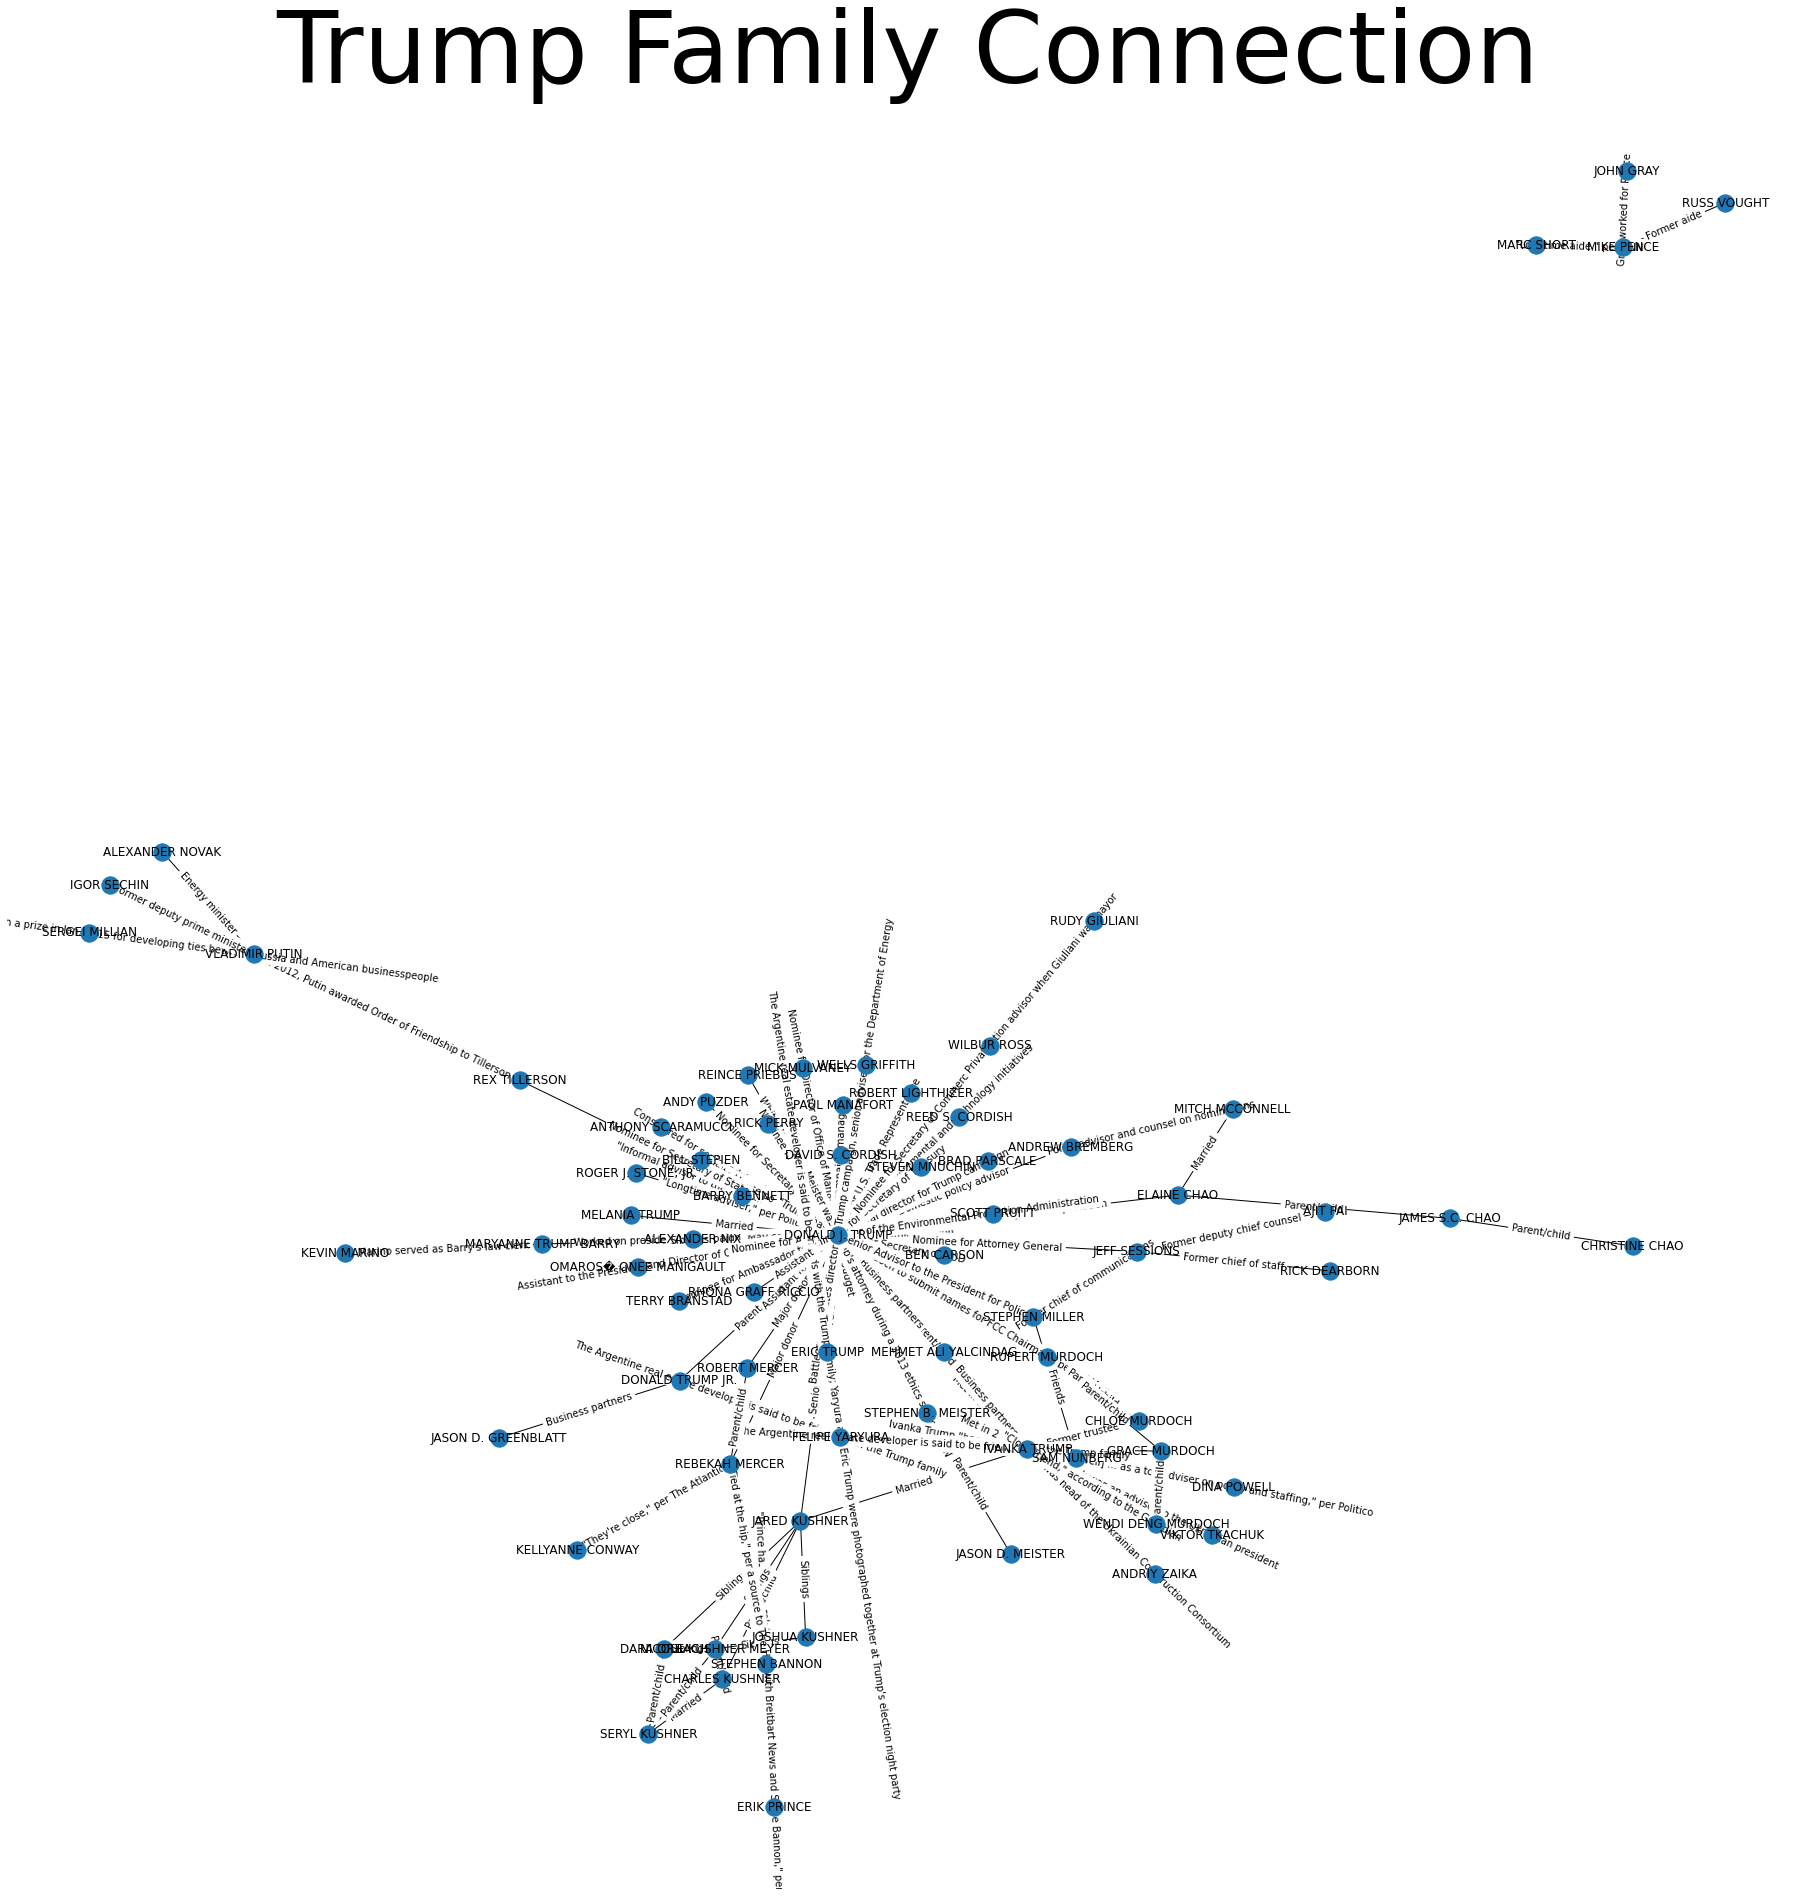

In [13]:
NetxG1 = nx.Graph()

#NetxG1.add_nodes_from(personA_nodes) #don't need this
NetxG1.add_edges_from(edge_list,connection=edge_label_dict)

plt.figure(figsize=(25,25)) 

pos = nx.spring_layout(NetxG1)
nx.draw(NetxG1, pos, with_labels=True)
nx.draw_networkx_edge_labels(NetxG1, pos=pos, edge_labels=edge_label_dict)

plt.title('Trump Family Connection',fontsize=100)
plt.show()